In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
NUM_CLASSES = 10

In [6]:
x_train = x_train.astype('float32') / 225.0
x_test = x_test.astype('float32') /225.0

In [8]:
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test ,NUM_CLASSES)

# Sequential Model

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model_s = Sequential([
    Dense(200, activation = 'relu',input_shape=(32,32,3)),
    Flatten(),
    Dense(150,activation = 'relu'),
    Dense(10,activation='softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model_s.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30720150  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


# Function API

In [11]:
from keras.layers import Input,Flatten,Dense
from keras.models import Model

input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)

x = Dense(units=200,activation = 'relu')(x)
x = Dense(units=150,activation = 'relu')(x)

output_layer = Dense(units=10,activation='softmax')(x)

model = Model(input_layer,output_layer)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Model compile

In [13]:
from keras.optimizers import Adam

In [14]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,
             metrics=['accuracy'])

# Model training

In [15]:
model.fit(x_train
         ,y_train
         ,batch_size =32
         ,epochs = 10
         ,shuffle=True
         )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 10s 190us/step - loss: 1.8496 - acc: 0.3347
Epoch 2/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.6787 - acc: 0.4008
Epoch 3/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.5984 - acc: 0.4319
Epoch 4/10
50000/50000 [==============================] - 9s 182us/step - loss: 1.5477 - acc: 0.4484
Epoch 5/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.5032 - acc: 0.4652
Epoch 6/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.4701 - acc: 0.4758
Epoch 7/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.4439 - acc: 0.4865
Epoch 8/10
50000/50000 [==============================] - 9s 178us/step - loss: 1.4184 - acc: 0.4963
Epoch 9/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.3988 - acc: 0.5008
Epoch 10/10
50000/50000 [=================

# Model evaluation

In [16]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 113us/step


[1.4835521835327148, 0.468]

In [17]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog',
                   'frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single= CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


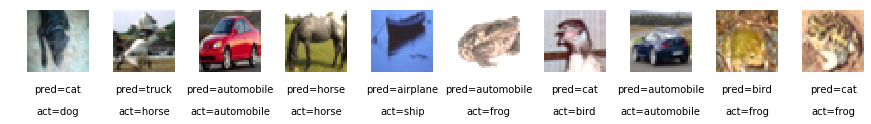

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred='+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.text(0.5,-0.7,'act='+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.imshow(img)

# Convolution_Neural_Network

In [29]:
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Activation

In [30]:
input_layer =Input(shape=(32,32,3))

x = Conv2D(
    filters=32
    ,kernel_size=3
    ,strides =1
    ,padding='same'
)(input_layer)
x= BatchNormalization()(x)
x= LeakyReLU()(x)

x= Conv2D(filters=32,kernel_size=3,strides=2,padding='same')(x)
x= BatchNormalization()(x)
x= LeakyReLU()(x)

x= Conv2D(filters=64,kernel_size=3,strides=1,padding='same')(x)
x= BatchNormalization()(x)
x= LeakyReLU()(x)

x= Conv2D(filters=64,kernel_size=3,strides=2,padding='same')(x)
x= BatchNormalization()(x)
x= LeakyReLU()(x)

x= Flatten()(x)

x = Dense(128)(x)
x= BatchNormalization()(x)
x= LeakyReLU()(x)
x= Dropout(rate =0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer,output_layer)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [33]:
model.compile(loss='categorical_crossentropy',optimizer=opt,
             metrics=['accuracy'])

In [35]:
model.fit(x_train
         ,y_train
         ,batch_size =32
         ,epochs = 10
         ,shuffle=True
         )

Epoch 1/10
50000/50000 [==============================] - 106s 2ms/step - loss: 0.8594 - acc: 0.6991
Epoch 2/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.8175 - acc: 0.7164
Epoch 3/10
50000/50000 [==============================] - 107s 2ms/step - loss: 0.7698 - acc: 0.7295
Epoch 4/10
50000/50000 [==============================] - 106s 2ms/step - loss: 0.7356 - acc: 0.7417
Epoch 5/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.6994 - acc: 0.7560
Epoch 6/10
50000/50000 [==============================] - 116s 2ms/step - loss: 0.6705 - acc: 0.7659
Epoch 7/10
50000/50000 [==============================] - 111s 2ms/step - loss: 0.6459 - acc: 0.7726
Epoch 8/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.6130 - acc: 0.7839
Epoch 9/10
50000/50000 [==============================] - 111s 2ms/step - loss: 0.5879 - acc: 0.7931
Epoch 10/10
50000/50000 [==============================] - 114s 2ms/step - loss: 0.5716 - a

In [36]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 630us/step


[0.8119636185646057, 0.7276]

In [37]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog',
                   'frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single= CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

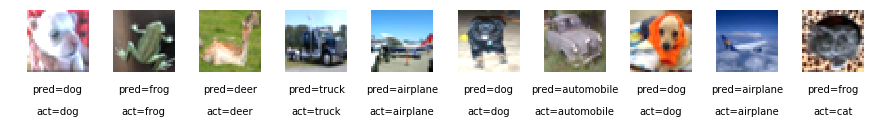

In [38]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred='+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.text(0.5,-0.7,'act='+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.imshow(img)